In [64]:
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image, image_dataset_from_directory
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.callbacks import History, ModelCheckpoint
from keras.optimizers import SGD

In [8]:
base_model = DenseNet121(input_shape= (224,224,3),
                          include_top=False,
                          weights='imagenet')

In [9]:
base_model.trainable = False

In [14]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x) 
x= Dense(1024, activation = 'relu')(x)
predictions = Dense(2, activation = 'softmax')(x)

In [22]:
model = Model(inputs= base_model.input, outputs = predictions)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy')

In [23]:
batch_size = 32
img_height = 224
img_width = 224
train_ds = image_dataset_from_directory(
  'Desktop/MelanomaTask',
  labels = "inferred",
  label_mode = 'categorical',
  color_mode = 'rgb',  
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle = True,
  image_size=(img_height, img_width),
  batch_size=batch_size)
validation_ds = image_dataset_from_directory(
  'Desktop/MelanomaTask',
  labels = "inferred",
  label_mode = 'categorical',
  color_mode = 'rgb',  
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle = True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18374 files belonging to 2 classes.
Using 14700 files for training.
Found 18374 files belonging to 2 classes.
Using 3674 files for validation.


In [33]:
callback = EarlyStopping(monitor='val_loss', patience=2)

In [53]:
model.fit(train_ds, epochs=epochs, validation_data=validation_ds, callbacks=[callback])

Epoch 1/20
460/460 [==============================] - 2567s 6s/step - loss: 0.3345 - val_loss: 0.2794
Epoch 2/20
460/460 [==============================] - 2737s 6s/step - loss: 0.3211 - val_loss: 0.3424
Epoch 3/20
460/460 [==============================] - 2726s 6s/step - loss: 0.3201 - val_loss: 0.3662


In [55]:
for i, layer in enumerate (base_model.layers):
    print (i, layer.name)

0 input_2
1 zero_padding2d_2
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_3
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu
47 conv2_block

In [56]:
for layer in model.layers[:313]:
    layer.trainable = False
for layer in model.layers[313:]:
    layer.trainable = True

In [62]:
model.compile(optimizer = SGD(lr=0.0001, momentum = 0.9), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [65]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto', restore_best_weights=True)

In [66]:
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=False)

In [67]:
epochs = 10
history = model.fit(train_ds, epochs=epochs, validation_data=validation_ds, callbacks=[early_stopping])

Epoch 1/10
460/460 [==============================] - 3223s 7s/step - loss: 0.5483 - accuracy: 0.8156 - val_loss: 0.2817 - val_accuracy: 0.8919
Epoch 2/10
460/460 [==============================] - 13402s 29s/step - loss: 0.3023 - accuracy: 0.8725 - val_loss: 0.2394 - val_accuracy: 0.9020
Epoch 3/10
460/460 [==============================] - 3298s 7s/step - loss: 0.2678 - accuracy: 0.8894 - val_loss: 0.2260 - val_accuracy: 0.9129
Epoch 4/10
460/460 [==============================] - 3249s 7s/step - loss: 0.2455 - accuracy: 0.8977 - val_loss: 0.2121 - val_accuracy: 0.9162
Epoch 5/10
460/460 [==============================] - 3266s 7s/step - loss: 0.2307 - accuracy: 0.9052 - val_loss: 0.2094 - val_accuracy: 0.9205
Epoch 6/10
460/460 [==============================] - 3174s 7s/step - loss: 0.2153 - accuracy: 0.9127 - val_loss: 0.1998 - val_accuracy: 0.9230
Epoch 7/10
460/460 [==============================] - 3163s 7s/step - loss: 0.2020 - accuracy: 0.9178 - val_loss: 0.1919 - val_accurac

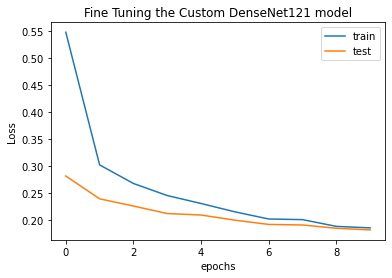

In [70]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Fine Tuning the Custom DenseNet121 model')
plt.legend()
plt.show()

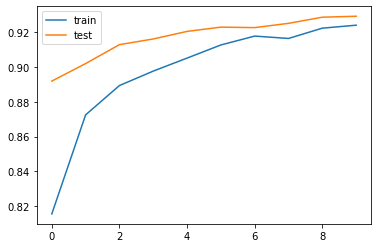

In [69]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")